In [6]:
import open3d as o3d
import open3d_tutorial as o3dtut
import numpy as np
import os
import re

In [4]:
def sorted_alphanum(file_list_ordered):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(file_list_ordered, key=alphanum_key)


def get_file_list(path, extension=None):
    if extension is None:
        file_list = [
            path + f for f in os.listdir(path) if os.path.isfile(join(path, f))
        ]
    else:
        file_list = [
            path + f
            for f in os.listdir(path)
            if os.path.isfile(os.path.join(path, f)) and
            os.path.splitext(f)[1] == extension
        ]
    file_list = sorted_alphanum(file_list)
    return file_list

In [7]:
path = o3dtut.download_fountain_dataset()
debug_mode = False

rgbd_images = []
depth_image_path = get_file_list(os.path.join(path, "depth/"), extension=".png")
color_image_path = get_file_list(os.path.join(path, "image/"), extension=".jpg")
assert (len(depth_image_path) == len(color_image_path))
for i in range(len(depth_image_path)):
    depth = o3d.io.read_image(os.path.join(depth_image_path[i]))
    color = o3d.io.read_image(os.path.join(color_image_path[i]))
    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
        color, depth, convert_rgb_to_intensity=False)
    if debug_mode:
        pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
            rgbd_image,
            o3d.camera.PinholeCameraIntrinsic(
                o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
        o3d.visualization.draw_geometries([pcd])
    rgbd_images.append(rgbd_image)

In [8]:
camera = o3d.io.read_pinhole_camera_trajectory(
    os.path.join(path, "scene/key.log"))
mesh = o3d.io.read_triangle_mesh(os.path.join(path, "scene", "integrated.ply"))

In [31]:
mesh = mesh.simplify_quadric_decimation(1000)


In [9]:
option = o3d.pipelines.color_map.ColorMapOptimizationOption()
option.maximum_iteration = 0
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    o3d.pipelines.color_map.color_map_optimization(mesh, rgbd_images, camera,
                                                   option)

[Open3D DEBUG] [ColorMapOptimization]
[Open3D DEBUG] [ColorMapOptimization] :: MakingMasks
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 0/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 1/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 2/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 3/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 4/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 5/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 6/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 7/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 8/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 9/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 10/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 11/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 12/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 13/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 14/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 15/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 16/33
[

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


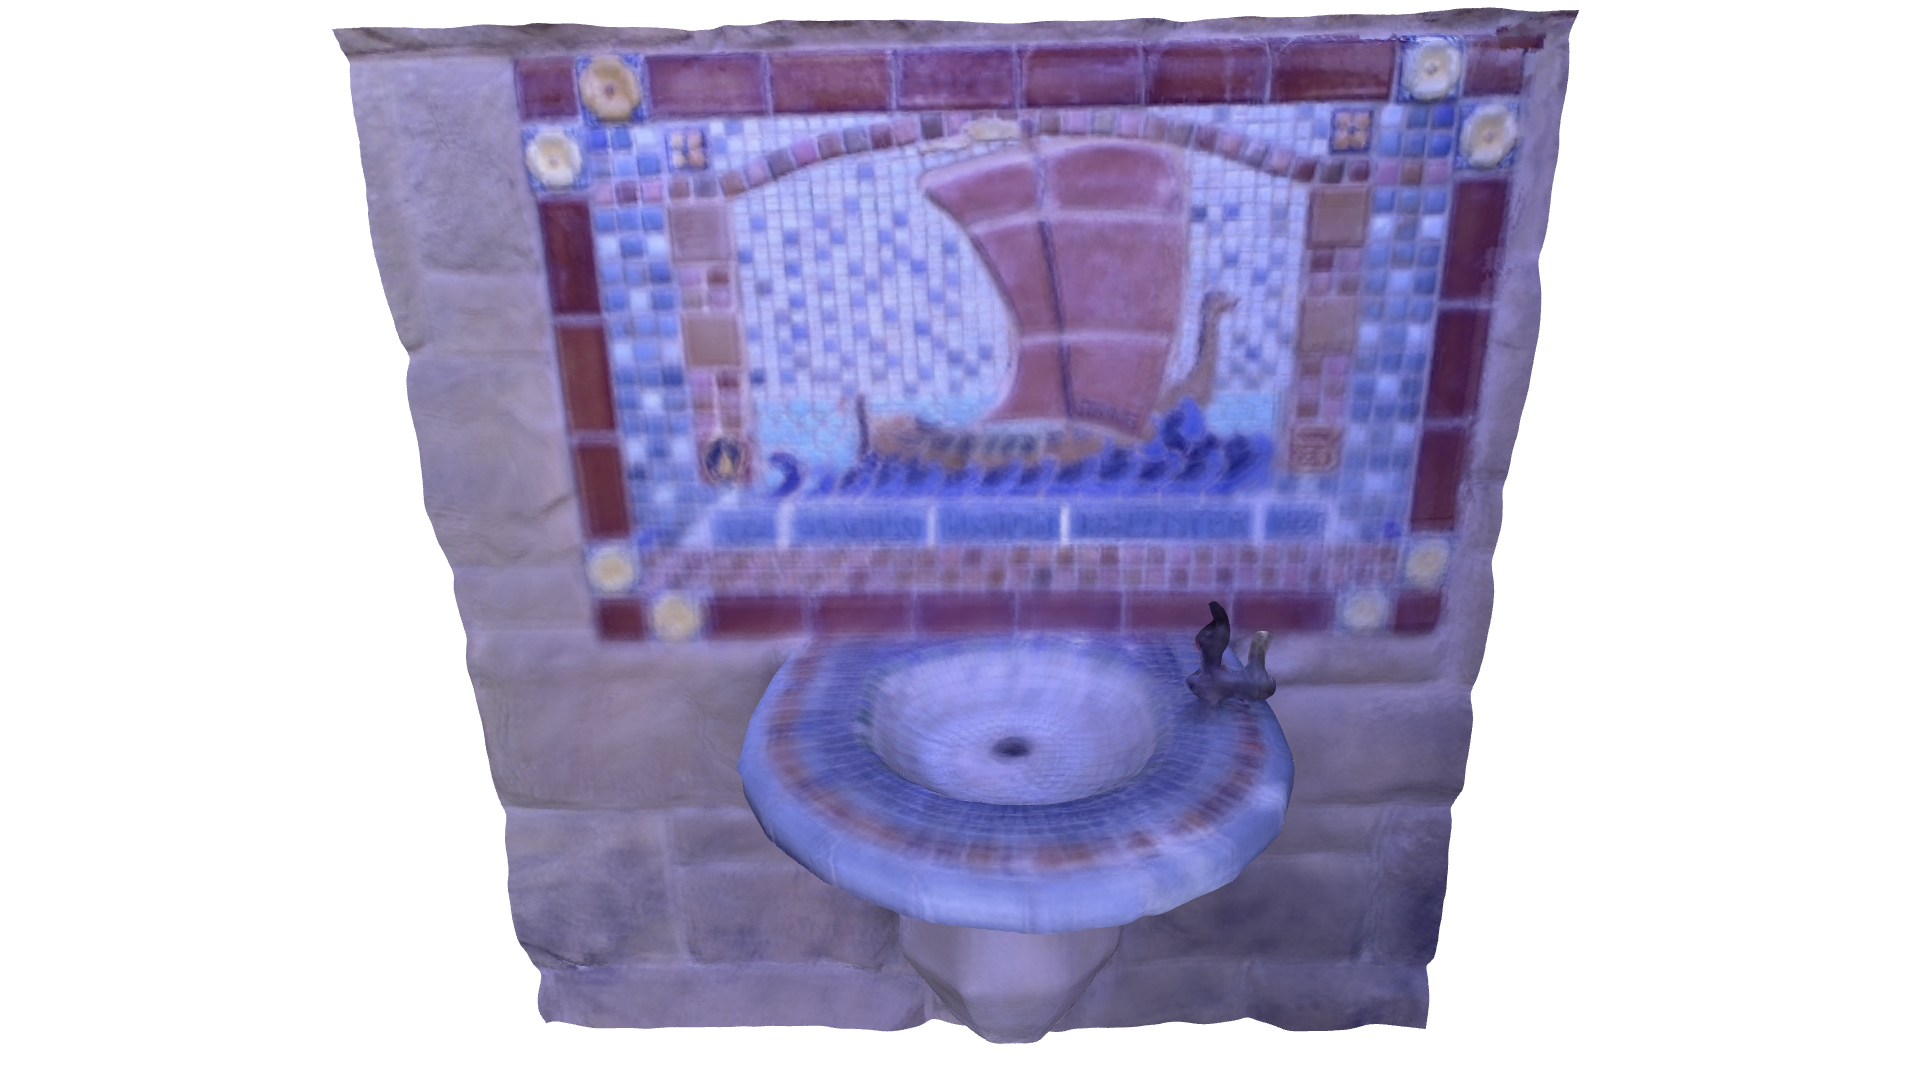

In [10]:
o3d.visualization.draw_geometries([mesh],
                                  zoom=0.5399,
                                  front=[0.0665, -0.1107, -0.9916],
                                  lookat=[0.7353, 0.6537, 1.0521],
                                  up=[0.0136, -0.9936, 0.1118])

In [11]:
print(path)

/Users/chrisheinrich/Open3D/examples/python/../test_data/fountain_small


In [32]:
option.maximum_iteration = 100
option.non_rigid_camera_coordinate = False
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    o3d.pipelines.color_map.color_map_optimization(mesh, rgbd_images, camera,
                                                   option)

[Open3D DEBUG] [ColorMapOptimization]
[Open3D DEBUG] [ColorMapOptimization] :: MakingMasks
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 0/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 1/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 2/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 3/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 4/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 5/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 6/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 7/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 8/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 9/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 10/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 11/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 12/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 13/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 14/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 15/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 16/33
[

[Open3D DEBUG] Residual error : 35.504411 (avg : 0.001910)
[Open3D DEBUG] [Iteration 0087] 
[Open3D DEBUG] Residual error : 35.493962 (avg : 0.001910)
[Open3D DEBUG] [Iteration 0088] 
[Open3D DEBUG] Residual error : 35.480380 (avg : 0.001909)
[Open3D DEBUG] [Iteration 0089] 
[Open3D DEBUG] Residual error : 35.470556 (avg : 0.001909)
[Open3D DEBUG] [Iteration 0090] 
[Open3D DEBUG] Residual error : 35.460781 (avg : 0.001908)
[Open3D DEBUG] [Iteration 0091] 
[Open3D DEBUG] Residual error : 35.454501 (avg : 0.001908)
[Open3D DEBUG] [Iteration 0092] 
[Open3D DEBUG] Residual error : 35.448556 (avg : 0.001907)
[Open3D DEBUG] [Iteration 0093] 
[Open3D DEBUG] Residual error : 35.433076 (avg : 0.001907)
[Open3D DEBUG] [Iteration 0094] 
[Open3D DEBUG] Residual error : 35.422975 (avg : 0.001906)
[Open3D DEBUG] [Iteration 0095] 
[Open3D DEBUG] Residual error : 35.414654 (avg : 0.001906)
[Open3D DEBUG] [Iteration 0096] 
[Open3D DEBUG] Residual error : 35.404684 (avg : 0.001905)
[Open3D DEBUG] [Itera

In [30]:
mesh.triangles

std::vector<Eigen::Vector3i> with 1033745 elements.
Use numpy.asarray() to access data.

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


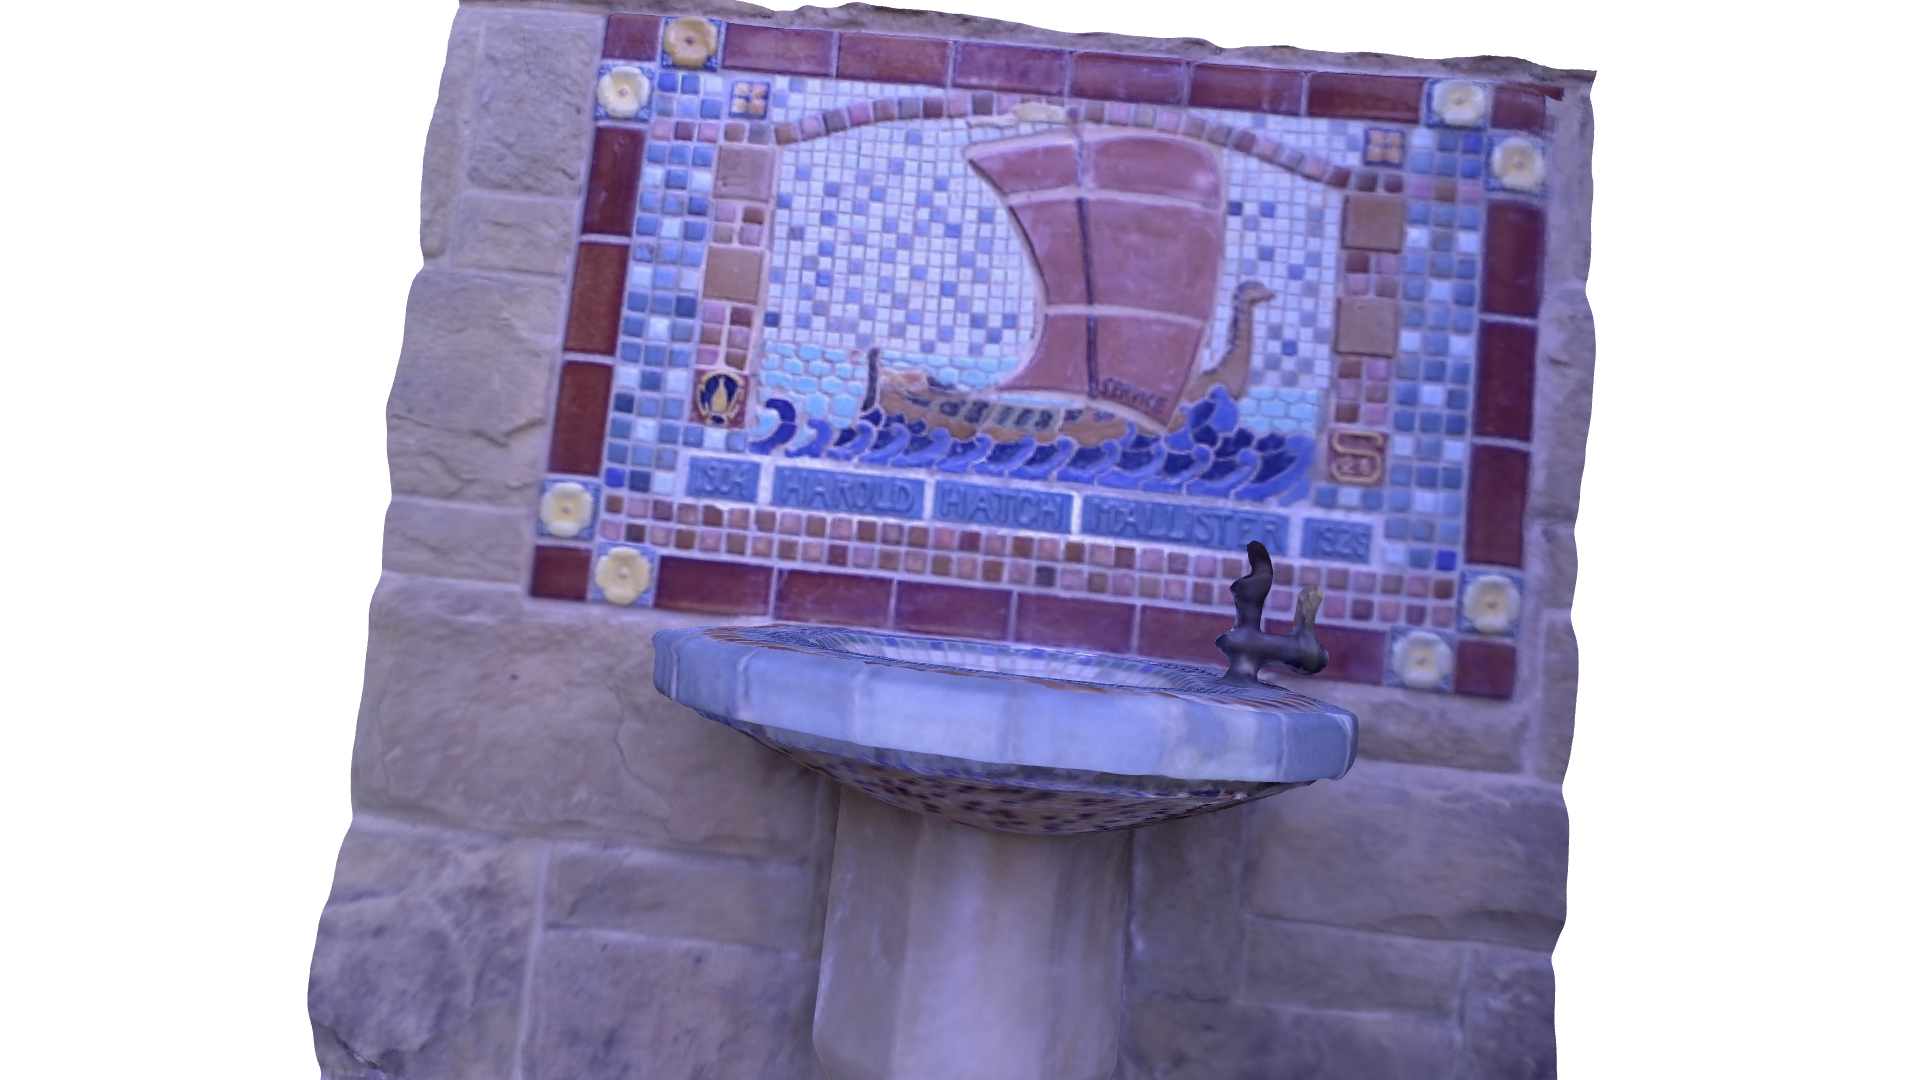

In [19]:
o3d.visualization.draw_geometries([mesh],
                                  zoom=0.5399,
                                  front=[0.0665, -0.1107, -0.9916],
                                  lookat=[0.7353, 0.6537, 1.0521],
                                  up=[0.0136, -0.9936, 0.1118])

In [20]:
option.maximum_iteration = 100
option.non_rigid_camera_coordinate = True
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    o3d.pipelines.color_map.color_map_optimization(mesh, rgbd_images, camera,
                                                   option)

[Open3D DEBUG] [ColorMapOptimization]
[Open3D DEBUG] [ColorMapOptimization] :: MakingMasks
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 0/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 1/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 2/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 3/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 4/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 5/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 6/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 7/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 8/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 9/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 10/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 11/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 12/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 13/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 14/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 15/33
[Open3D DEBUG] [MakeDepthMasks] geometry::Image 16/33
[

[Open3D DEBUG] Residual error : 7194.089767, reg : 1226.127953
[Open3D DEBUG] [Iteration 0043] 
[Open3D DEBUG] Residual error : 7180.128642, reg : 1243.720333
[Open3D DEBUG] [Iteration 0044] 
[Open3D DEBUG] Residual error : 7166.845809, reg : 1260.641615
[Open3D DEBUG] [Iteration 0045] 
[Open3D DEBUG] Residual error : 7153.911967, reg : 1277.335645
[Open3D DEBUG] [Iteration 0046] 
[Open3D DEBUG] Residual error : 7141.752472, reg : 1293.323192
[Open3D DEBUG] [Iteration 0047] 
[Open3D DEBUG] Residual error : 7129.821124, reg : 1309.004842
[Open3D DEBUG] [Iteration 0048] 
[Open3D DEBUG] Residual error : 7118.433323, reg : 1324.155029
[Open3D DEBUG] [Iteration 0049] 
[Open3D DEBUG] Residual error : 7107.342178, reg : 1339.107949
[Open3D DEBUG] [Iteration 0050] 
[Open3D DEBUG] Residual error : 7096.719384, reg : 1353.540926
[Open3D DEBUG] [Iteration 0051] 
[Open3D DEBUG] Residual error : 7086.175738, reg : 1367.769560
[Open3D DEBUG] [Iteration 0052] 
[Open3D DEBUG] Residual error : 7075.929

In [24]:
output_path = "/Users/chrisheinrich/Open3D/examples/python/fountain.obj"

[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


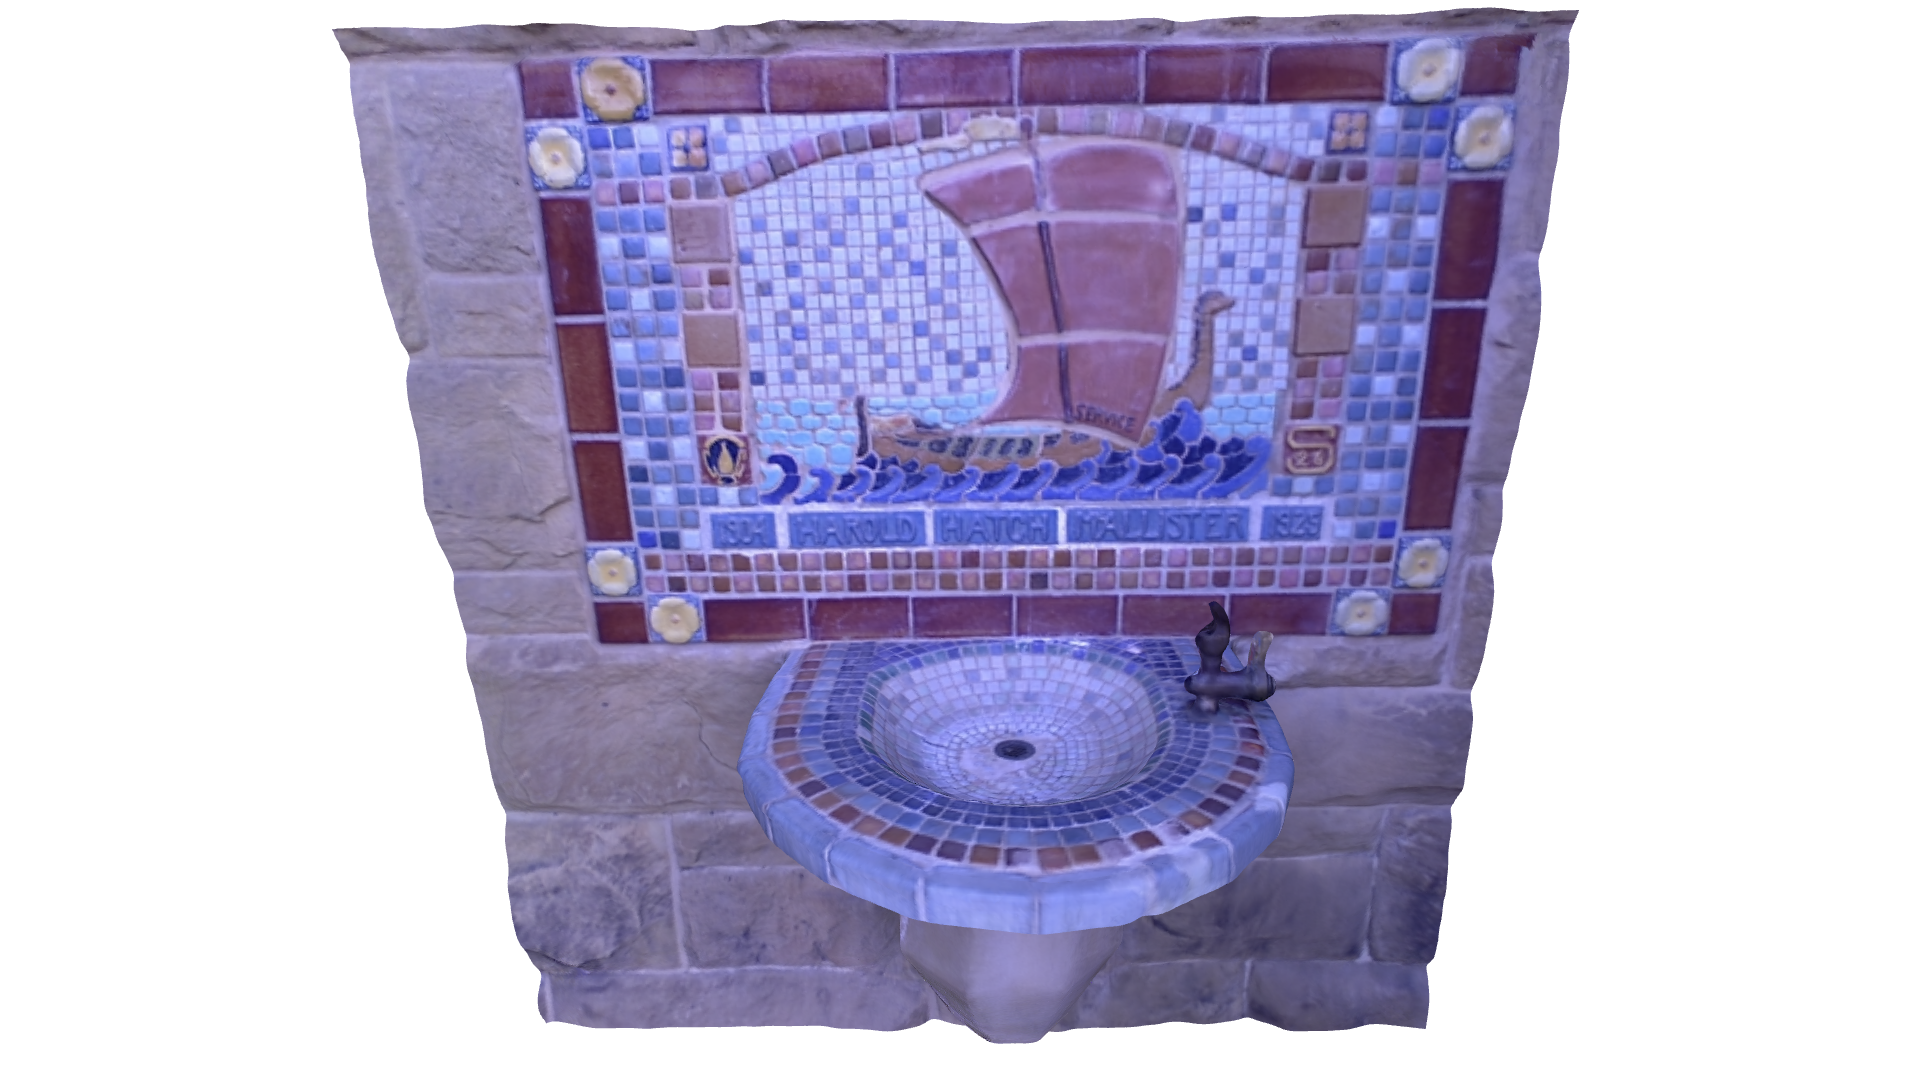

In [22]:
o3d.visualization.draw_geometries([mesh],
                                  zoom=0.5399,
                                  front=[0.0665, -0.1107, -0.9916],
                                  lookat=[0.7353, 0.6537, 1.0521],
                                  up=[0.0136, -0.9936, 0.1118])

In [33]:
o3d.io.write_triangle_mesh(output_path, mesh)

True